## **Transfer Learning with VGG16 and ResNet for Image Classification and Feature Extraction**

###**Introduction**                                                                              
In this notebook, we will demonstrate how to use transfer learning to improve model performance for image classification tasks with limited training data. We will leverage pre-trained models such as VGG16 and ResNet, and show how to fine-tune these models and use them for feature extraction.

**Prerequisites**

Before we begin, make sure you have the necessary libraries installed:

In [ ]:
!pip install tensorflow keras numpy matplotlib


**Loading the Required Libraries**

First, let's import the necessary libraries.

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt


**Data Preparation**

We will use a sample dataset. For demonstration purposes, you can use any dataset such as CIFAR-10, or a custom dataset stored locally.

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Define data generators for data augmentation
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train_one_hot, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test_one_hot, batch_size=32)


170498071/170498071 [==============================] - 4s 0us/step


**Fine-Tuning a Pre-Trained Model (VGG16)**

We will fine-tune the VGG16 model for our dataset.

In [13]:
# Load the VGG16 model with pre-trained weights, excluding the top classification layer
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model_vgg.layers:
    layer.trainable = False

# Add new classification layers
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='tanh')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions)

# Compile the model
model_vgg.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(train_generator, epochs=10, validation_data=test_generator)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
1563/1563 [==============================] - 778s 497ms/step - loss: 1.5836 - accuracy: 0.4408 - val_loss: 1.3754 - val_accuracy: 0.5131
Epoch 2/10
1563/1563 [==============================] - 771s 494ms/step - loss: 1.4596 - accuracy: 0.4847 - val_loss: 1.3454 - val_accuracy: 0.5281
Epoch 3/10
1563/1563 [==============================] - 768s 491ms/step - loss: 1.4252 - accuracy: 0.4985 - val_loss: 1.3058 - val_accuracy: 0.5413
Epoch 4/10
1563/1563 [==============================] - 766s 490ms/step - loss: 1.4070 - accuracy: 0.5047 - val_loss: 1.3920 - val_accuracy: 0.5114
Epoch 5/10
1563/1563 [==============================] - 766s 490ms/step - loss: 1.3782 - accuracy: 0.5102 - val_loss: 1.2762 - val_accuracy: 0.5506
Epoch 6/10
1563/1563 [==============================] - 788s 505ms/step - loss: 1.3709 - accuracy: 0.5146 - val_loss: 1.3276 - val_accuracy: 0.5336
Epoch 7/10
1563/1563 [=========================

**Feature Extraction Using a Pre-Trained Model (ResNet50)**

Next, we will use ResNet50 for feature extraction.

In [11]:
# Load the ResNet50 model with pre-trained weights, excluding the top classification layer
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model_resnet.layers:
    layer.trainable = False

# Add new classification layers
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)

# Compile the model
model_resnet.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
1563/1563 [==============================] - 399s 216ms/step - loss: 2.3124 - accuracy: 0.1268 - val_loss: 2.1978 - val_accuracy: 0.1890
Epoch 2/10
1563/1563 [==============================] - 336s 215ms/step - loss: 2.2210 - accuracy: 0.1522 - val_loss: 2.1504 - val_accuracy: 0.2190
Epoch 3/10
1563/1563 [==============================] - 351s 225ms/step - loss: 2.2009 - accuracy: 0.1600 - val_loss: 2.1116 - val_accuracy: 0.2440
Epoch 4/10
1563/1563 [==============================] - 337s 216ms/step - loss: 2.1878 - accuracy: 0.1708 - val_loss: 2.0606 - val_accuracy: 0.2613
Epoch 5/10
1563/1563 [==============================] - 333s 213ms/step - loss: 2.1761 - accuracy: 0.1758 - val_loss: 2.0093 - val_accuracy: 0.2715
Epoch 6/10
1563/1563 [==============================] - 333s 213ms/step - loss: 2.1657 - accuracy: 0.1839 - val_loss: 2.0631 - val_accuracy: 0.2587
Epoch 7/10
1563/1563 [==============================] - 330s 211ms/step - loss: 2.1562 - accuracy: 0.1862 - val_

**Visualization and Performance Comparison**

Let's visualize the training process and compare the performance of the models.

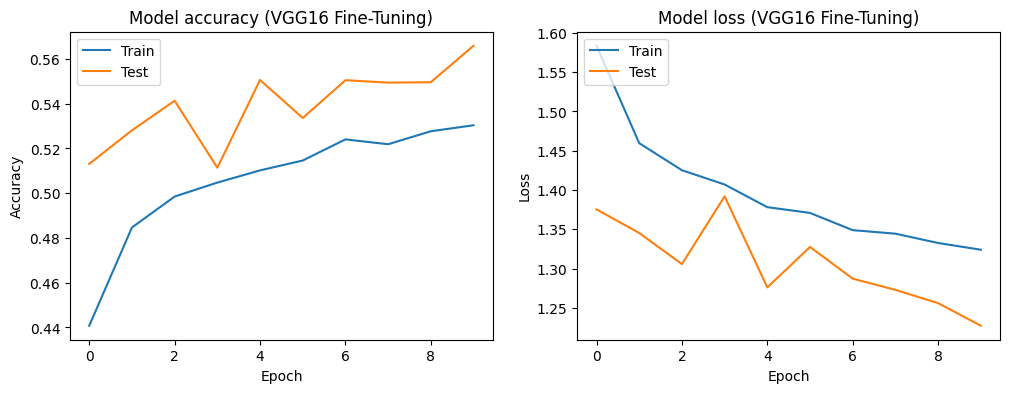

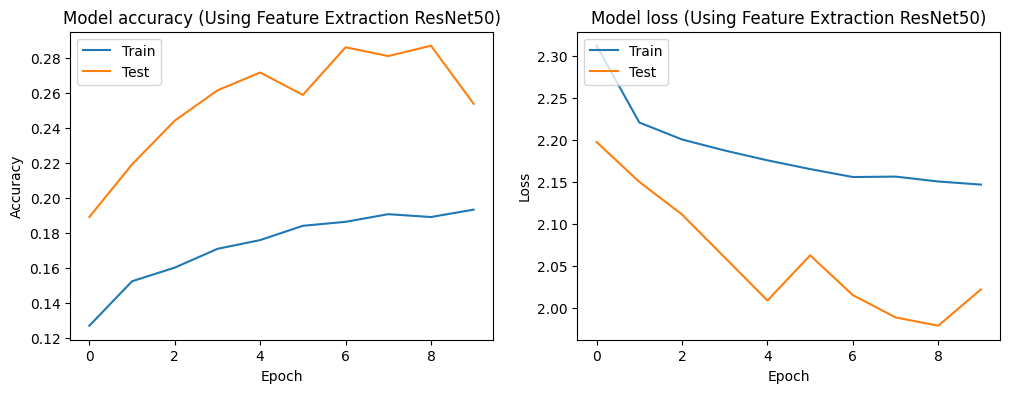

In [17]:
# Plot training & validation accuracy values for VGG16 fine-tuning
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('Model accuracy (VGG16 Fine-Tuning)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for VGG16 fine-tuning
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('Model loss (VGG16 Fine-Tuning)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training & validation accuracy values for Feature Extraction Using a Pre-Trained Model (ResNet50)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model accuracy (Using Feature Extraction ResNet50)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values for Feature Extraction Using a Pre-Trained Model (ResNet50)
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model loss (Using Feature Extraction ResNet50)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


**Conclusion**

In this notebook, we demonstrated how to fine-tune a pre-trained VGG16 model and how to use ResNet50 for feature extraction to improve performance on a new dataset with limited data. Transfer learning significantly enhances model performance compared to training from scratch by leveraging the knowledge gained from large datasets used to train the pre-trained models.

